In [1]:
#Session 2: Machine Learning for Regression
# we will use the California Housing Prices from Kaggle
# wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [ ]:
1. Data Preparation

In [2]:
dataset_url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [ ]:
!wget $dataset_url

In [3]:
import numpy as np
import pandas as pd

#we can use 2 libraries for data visualization whith plotting
import matplotlib.pyplot as plt
import seaborn as sns

#to make sure all the plots can be displayed on the notebook
%matplotlib inline

In [4]:
#Getting the data
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
#we can get data statistics for each column
for col in df.columns:
    print(col)
    print(df[col].head(),'\n')

longitude
0   -122.23
1   -122.22
2   -122.24
3   -122.25
4   -122.25
Name: longitude, dtype: float64 

latitude
0    37.88
1    37.86
2    37.85
3    37.85
4    37.85
Name: latitude, dtype: float64 

housing_median_age
0    41.0
1    21.0
2    52.0
3    52.0
4    52.0
Name: housing_median_age, dtype: float64 

total_rooms
0     880.0
1    7099.0
2    1467.0
3    1274.0
4    1627.0
Name: total_rooms, dtype: float64 

total_bedrooms
0     129.0
1    1106.0
2     190.0
3     235.0
4     280.0
Name: total_bedrooms, dtype: float64 

population
0     322.0
1    2401.0
2     496.0
3     558.0
4     565.0
Name: population, dtype: float64 

households
0     126.0
1    1138.0
2     177.0
3     219.0
4     259.0
Name: households, dtype: float64 

median_income
0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: median_income, dtype: float64 

median_house_value
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64 

ocean_pro

In [9]:
#we can get first 5 (from 0-th element to 4-th element) unique values for each object of dataframe
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique(),'\n') #here we get the number of unique values for each column

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
844 

latitude
[37.88 37.86 37.85 37.84 37.83]
862 

housing_median_age
[41. 21. 52. 42. 50.]
52 

total_rooms
[ 880. 7099. 1467. 1274. 1627.]
5926 

total_bedrooms
[ 129. 1106.  190.  235.  280.]
1923 

population
[ 322. 2401.  496.  558.  565.]
3888 

households
[ 126. 1138.  177.  219.  259.]
1815 

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928 

median_house_value
[452600. 358500. 352100. 341300. 342200.]
3842 

ocean_proximity
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
5 



/tmp/ipykernel_8143/740686974.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=50, ax=ax, layout=(3,3), column=df.columns.to_list())


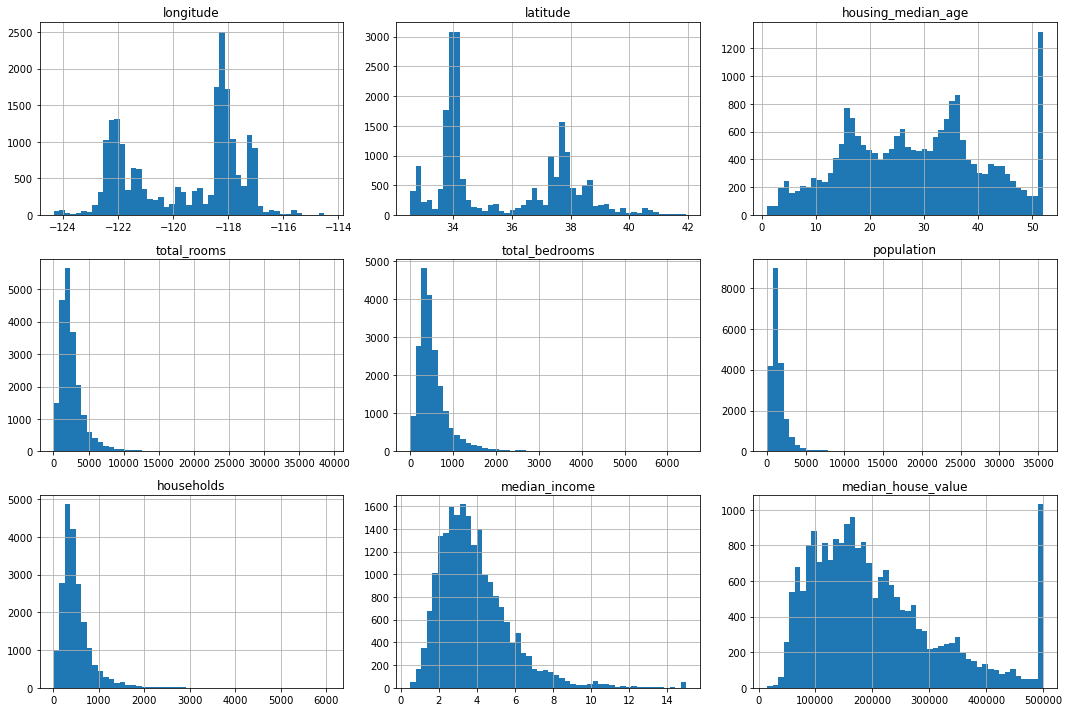

In [10]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
df.hist(bins=50, ax=ax, layout=(3,3), column=df.columns.to_list())
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

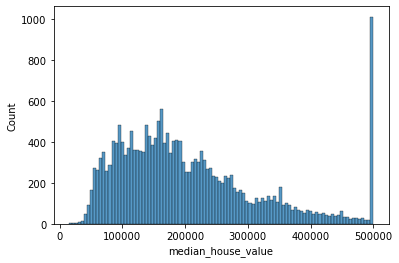

In [13]:
#we want to look at the distribution of housing prices
# to draw a histogram
sns.histplot(df.median_house_value, bins=100)

/home/wazer/anaconda3/envs/mlops-zoomcamp-course/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

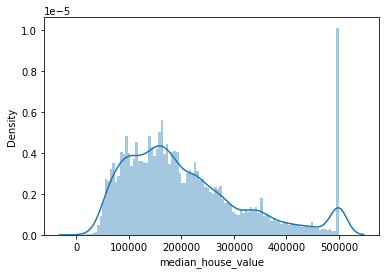

In [11]:
sns.distplot(df.median_house_value, bins=100)

In [ ]:
#as we can see the distribution of 'median_house_value' has a long tail (at least it is not quite normal)
# so one can apply the logarithmic function to 'median_house_value'
# to make it close to normal distribution

/home/wazer/anaconda3/envs/mlops-zoomcamp-course/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

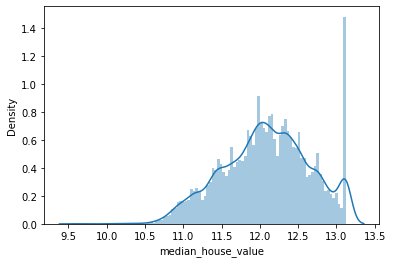

In [12]:
sns.distplot(np.log1p(df.median_house_value), bins=100)

In [ ]:
#Question 1
# Find a feature with missing values. How many missing values does it have?

# The only feature with missing values is 'total_bedrooms';
# it counts 207 missing values

#We have to keep this in mind when we train our model (!!!)

In [14]:
#Missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [55]:
# There is only one feature with missing values in dataframe
missing_values_df = df.isnull().sum().value_counts()
missing_values_df

0      9
207    1
dtype: int64

In [59]:
# and it counts 207 missing values
df.isnull().sum().sum(axis=0)

207

In [61]:
#Question 2
# What's the median (50% percentile) for variable 'population'?
df.population.median()

1166.0

In [68]:
df.describe(percentiles=[.0, .25, .5, 0.75, .9, 0.95, .99, .1]).T.loc['population', '50%']

1166.0

In [81]:
df.describe(percentiles=[.0, .25, .5, 0.75, .9, 0.95, .99, .1]).T.loc[['population'], ['50%']]

,50%
population,1166.0


In [82]:
#since in the next steps we do not need the 'ocean proximity' column, we will remove it from our dataframe
del df['ocean_proximity']

In [85]:
list(df.columns.values)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [ ]:
2. Settng up the validation framework

In [86]:
#the whole amount of entries
n = len(df)
n

20640

In [87]:
#the size of validation dataset
n_val = int(n * .2)
n_val

4128

In [88]:
#the size of test dataset
n_test = int(n * .2)
n_test

4128

In [89]:
#the size of train dataset
n_train = n - n_val - n_test
n_train

12384

In [90]:
n_train, n_val, n_test

(12384, 4128, 4128)

In [133]:
#generate a sequence from 1 to (n-1)
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [134]:
#shuffle indexes 'idx'
# notice that it ain't needed to assign shuffled values to 'idx'
# because np.random.shuffle(idx) rearranges idx-values automatically

# and another thing should be mentioned:
# to make results reproducible we should use seed() function
np.random.seed(42)

np.random.shuffle(idx)
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [186]:
#now we create train dataframe applying shuffled indexes 'idx'
df_train = df.iloc[idx[:n_train]]

In [187]:
#now we create validation dataframe applying shuffled indexes 'idx'
df_val = df.iloc[idx[n_train:n_train+n_val]]

In [188]:
#now we create test dataframe applying shuffled indexes 'idx'
df_test = df.iloc[idx[n_train+n_val:]]

In [189]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [190]:
#resetting indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [191]:
df_train.median_house_value

0         47700.0
1         45800.0
2        500001.0
3        218600.0
4        278000.0
           ...   
12379    461300.0
12380    205800.0
12381    146800.0
12382    151800.0
12383    420300.0
Name: median_house_value, Length: 12384, dtype: float64

In [192]:
df_train.median_house_value.values

array([ 47700.,  45800., 500001., ..., 146800., 151800., 420300.])

In [193]:
# the applying of logarithmic function allows to operate smaller values instead of larger ones
# BUT IN A CASE OF USING LOGARITHMIC FUNCTION we need to except Zero values to avoid errors while executing the code
# so keeping this in mind we can simply add 1 to the value in each field

# applying logarithmic function to 'median_house_value'
np.log1p(df_train.median_house_value)

0        10.772708
1        10.732061
2        13.122367
3        12.295003
4        12.535380
           ...    
12379    13.041806
12380    12.234665
12381    11.896833
12382    11.930326
12383    12.948726
Name: median_house_value, Length: 12384, dtype: float64

In [194]:
#and instead of pandas.series we can immediately get np.array
np.log1p(df_train.median_house_value.values)

array([10.77270764, 10.7320612 , 13.12236738, ..., 11.89683321,
       11.93032573, 12.9487264 ])

In [195]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [196]:
#now we'll remove 'median_house_value' column from our datasets
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [197]:
len(y_train), len(y_val), len(y_test)

(12384, 4128, 4128)

In [ ]:
#Question 3

# We need to deal with missing values for the column from Q1.
# We have two options: fill it with 0 or with the mean of this variable.
# Try both options. For each, train a linear regression model without regularization using the code from the lessons.
# For computing the mean, use the training only!
# Use the validation dataset to evaluate the models and compare the RMSE of each option.
# Round the RMSE scores to 2 decimal digits using round(score, 2)
# Which option gives better RMSE?


In [147]:
#forming baseline model for prediction
df_train.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
dtype: object

In [148]:
#For the Baseline Model we need to extract all numerical columns
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [149]:
#getting basic features
base = df_train.columns.to_list()
base

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [151]:
#check if there are 'NaN' values in 'df_train' dataframe
df_train[base].isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [ ]:
#use RMSE to Evaluate how good is Regression model
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
        
    return np.sqrt(mse)

In [ ]:
# train Linear Regression Function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    #normal equation
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [ ]:
3.1 Linear Regression with no Regularization using 'df.fillna(0)' method

In [155]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [156]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train) #training

X_val = prepare_X(df_val)                         #validating
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.3295330365225461

In [157]:
round(score, 2)

0.33

In [ ]:
3.2 Linear Regression with no Regularization using 'df.fillna(mean)' method

In [159]:
#using 'df.fillna(mean)' method
# For computing the mean, use the training only (!!!)
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(df_train[base].mean())
    X = df_num.values
    
    return X

In [160]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train) #training

X_val = prepare_X(df_val)                         #validating
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.3290195439006594

In [161]:
round(score, 2)

0.33

In [162]:
#ANSWER for Question №3

# After the validation of trained model on the validation dataset
# having compared the RMSE for each option we can conclude that both options are equally good 

In [163]:
#Question 4

# Now let's train a regularized linear regression.
# For this question, fill the NAs with 0.
# Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
# Use RMSE to evaluate the model on the validation dataset.
# Round the RMSE scores to 2 decimal digits.
# Which r gives the best RMSE?

# If there are multiple options, select the smallest r (!!!)

In [ ]:
4. Linear Regression with Regularization using 'df.fillna(0)' method

In [164]:
# Training Linear Regression Function with Regularization
def train_linear_regression_reg(X, y, r=0.001):   #where '0.001' is the default value
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    #normal equation
    XTX = X.T.dot(X)
    
    XTX = XTX + r * np.eye(XTX.shape[0])          #regularization
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [165]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [166]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01) #training

X_val = prepare_X(df_val)                        #validating
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3295319365991787

In [167]:
# TUNING THE MODEL

#we need now to find the optimal value for regullarization parameter
# and for this purpose we'll use the validation dataset

In [168]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r) #training

    X_val = prepare_X(df_val)                        #validating
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred).round(2)
    print('for r=%s:' % r, '\nw0 =', w0,'\nand the score is:', score, '\n')

for r=0: 
w0 = -11.686975241722367 
and the score is: 0.33 

for r=1e-06: 
w0 = -11.686959175597698 
and the score is: 0.33 

for r=0.0001: 
w0 = -11.685368865326225 
and the score is: 0.33 

for r=0.001: 
w0 = -11.670931317790998 
and the score is: 0.33 

for r=0.01: 
w0 = -11.528493585934847 
and the score is: 0.33 

for r=0.1: 
w0 = -10.27450028213499 
and the score is: 0.33 

for r=1: 
w0 = -4.920480897663232 
and the score is: 0.33 

for r=5: 
w0 = -1.4820957456380226 
and the score is: 0.34 

for r=10: 
w0 = -0.7899311832160492 
and the score is: 0.34 



In [ ]:
#ANSWER for Question №4

#    Which r gives the best RMSE?
#   (If there are multiple options, select the smallest r)

# ANSWER: r=0

In [169]:
#Question 5

# We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
# Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
# For each seed, do the train/validation/test split with 60%/20%/20% distribution.
# Fill the missing values with 0 and train a model without regularization.
# For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
# Round the result to 3 decimal digits (round(std, 3))

# Note (!!!):
#  Standard deviation shows how different the values are.
#  If it's low, then all values are approximately the same.
#  If it's high, the values are different.
#  If standard deviation of scores is low, then our model is stable.

In [170]:
# Let's find out how selecting the seed influences our score
# we'll try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [198]:
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [199]:
#generate a sequence from 1 to (n-1)
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [200]:
#shuffle indexes 'idx'
# notice that it ain't needed to assign shuffled values to 'idx'
# because np.random.shuffle(idx) rearranges idx-values automatically

# and another thing should be mentioned:
# to make results reproducible we should use seed() function
np.random.seed(42)

np.random.shuffle(idx)
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [212]:
df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

In [213]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [214]:
#now we'll remove 'median_house_value' column from our datasets
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [206]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [209]:
scores = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]].reset_index(drop=True).copy()
    df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True).copy()
    df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True).copy()
    
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    #now we'll remove 'median_house_value' column from our datasets
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=0) #training

    X_val = prepare_X(df_val)                        #validating
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)
    scores.append(score)
    print('for seed=%s:' % s, '\nw0 =', w0, '\nand the score is:', score, '\nscores:', scores, '\n')

for seed=0: 
w0 = -11.900382138194047 
and the score is: 0.3388430480531453 
scores: [0.3388430480531453] 

for seed=1: 
w0 = -11.732757373039586 
and the score is: 0.3362387255956947 
scores: [0.3388430480531453, 0.3362387255956947] 

for seed=2: 
w0 = -11.806729361139615 
and the score is: 0.33209123188261924 
scores: [0.3388430480531453, 0.3362387255956947, 0.33209123188261924] 

for seed=3: 
w0 = -11.587900347723947 
and the score is: 0.3405153609036206 
scores: [0.3388430480531453, 0.3362387255956947, 0.33209123188261924, 0.3405153609036206] 

for seed=4: 
w0 = -11.389470587989573 
and the score is: 0.33890240665740773 
scores: [0.3388430480531453, 0.3362387255956947, 0.33209123188261924, 0.3405153609036206, 0.33890240665740773] 

for seed=5: 
w0 = -11.447114275943875 
and the score is: 0.343486672571847 
scores: [0.3388430480531453, 0.3362387255956947, 0.33209123188261924, 0.3405153609036206, 0.33890240665740773, 0.343486672571847] 

for seed=6: 
w0 = -11.370516351454182 
and the

In [210]:
#Note: Standard deviation shows how different the values are
# If it's low, then all values are approximately the same
# If it's high, the values are different

# If standard deviation of scores is low, then our model is stable (!!!)
np.std(scores)

0.004170771947167763

In [211]:
#Round the result to 3 decimal digits with function 'round(std, 3)'
round(np.std(scores), 3)

0.004

In [ ]:
#ANSWER for Question №5

# ANSWER: 0.004

In [215]:
#Question 6
# Split the dataset like previously, use seed 9.
# Combine train and validation datasets.
# Fill the missing values with 0 and train a model with r=0.001.
# What's the RMSE on the test dataset?

In [216]:
scores = []
for s in [9]:
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]].reset_index(drop=True).copy()
    df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True).copy()
    df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True).copy()
    
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    #now we'll remove 'median_house_value' column from our datasets
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=0) #training

    X_val = prepare_X(df_val)                        #validating
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)
    scores.append(score)
    print('for seed=%s:' % s, '\nw0 =', w0,'\nand the score is:', score, '\n', scores, '\n')

for seed=9: 
w0 = -11.459046830679359 
and the score is: 0.3365926124150145 
 [0.3365926124150145] 



In [217]:
scores = []
for s in [9]:
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]].reset_index(drop=True).copy()
    df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True).copy()
    df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True).copy()
          
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    df_train_full = pd.concat([df_train, df_val]).reset_index(drop=True)
    y_train_full = np.concatenate([y_train, y_val])
    
    #now we'll remove 'median_house_value' column from our datasets
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    del df_train_full['median_house_value']
    
    X_train_full = prepare_X(df_train_full)
    w0, w = train_linear_regression_reg(X_train_full, y_train_full, r=0.001) #training

    X_test = prepare_X(df_test)                        #validating
    y_pred = w0 + X_test.dot(w)
    
    score = rmse(y_test, y_pred)
    scores.append(score)
    print('for seed=%s:' % s, '\nw0 =', w0,'\nand the score is:', score, '\n', scores, '\n')

for seed=9: 
w0 = -11.407983344571907 
and the score is: 0.3453168914361534 
 [0.3453168914361534] 



In [ ]:
#ANSWER for Question №5

# ANSWER: 0.345